In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

C:\Users\Apaala\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [6]:
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

## Missing Data

In [7]:
cols=['card_present_flag', 'bpay_biller_code', 'merchant_state']
for col in cols:
    print(col, " ", df[col].unique())

card_present_flag   [ 1.  0. nan]
bpay_biller_code   [nan 0 ' THE DISCOUNT CHEMIST GROUP'
 ' LAND WATER & PLANNING East Melbourne']
merchant_state   ['QLD' 'NSW' nan 'VIC' 'WA' 'SA' 'NT' 'TAS' 'ACT']


We can fill the missing card_present values with 0.
bpay_biller has too many missing values we will not consider this columns

In [8]:
df['card_present_flag']=df['card_present_flag'].fillna(0)

## EDA

In [9]:
#avg transaction amount
avg_amt=df['amount'].mean()
#avg number of transactions
avg_transactions=df.groupby('customer_id').count()['status'].mean()
print(f"Average transaction amount : {avg_amt}")
print(f"Average number of transactions per customer: {avg_transactions}")

Average transaction amount : 187.93358797641767
Average number of transactions per customer: 120.43


Averages by gender 

Average transaction amount
F : 168.51730288294547
M : 205.7218090692124 

Average number of transactions
F: 130.86363636363637
M: 112.23214285714286


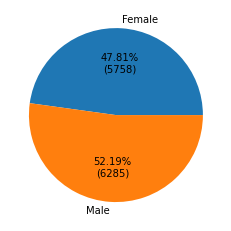

In [10]:
## by gender

fem=df[df['gender']=='F'].shape[0]
m=df.shape[0]-fem
label=['Female',"Male"]
sizes = [fem,m]
plt.pie(sizes, labels=label, autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*df.shape[0]));


print('Averages by gender \n')
#avg transaction amount
avg_amt=df.groupby('gender')['amount'].mean()
print("Average transaction amount")
print(avg_amt.index[0],":" ,avg_amt[0])
print(avg_amt.index[1],":" ,avg_amt[1],"\n")


#avg number of transactions
avg_transactions=df.groupby(['gender','customer_id']).count()['status']
avg_trans_f=avg_transactions['F'].mean()
avg_trans_m=avg_transactions['M'].mean()

print("Average number of transactions")
print("F:" ,avg_trans_f)
print("M:" ,avg_trans_m)

Averages by state 

Average transaction amount
QLD :66.80
NSW :47.04
VIC :44.73
WA :34.37
SA :40.43
NT :28.87
TAS :41.10
ACT :30.90

Average number of transaction by state
QLD : 23.58
NSW : 24.37
VIC : 23.68
WA : 16.92
SA : 6.01
NT : 29.29
TAS : 6.80
ACT : 4.06


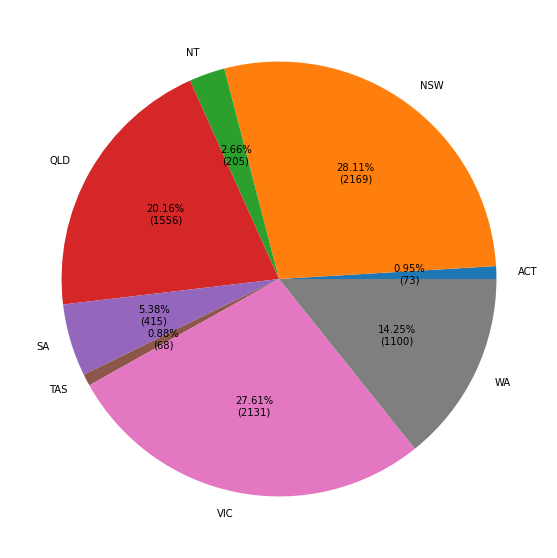

In [12]:
## by state
df_state=df[['merchant_state','customer_id','amount']]
df_state=df_state.dropna()
states=df_state['merchant_state'].unique()
print('Averages by state \n')
#avg transaction amount
avg_amt=df_state.groupby('merchant_state')['amount'].mean()
print("Average transaction amount")
for i,st in enumerate(states):
    print(st,":{:.2f}".format(avg_amt[i]))

#avg number of transaction
print('\nAverage number of transaction by state')
av_st=df.groupby(['merchant_state','customer_id']).count()['amount']
for st in states:
    avg=av_st[st].mean()
    print(st,": {:.2f}".format(avg))
    
#number of transactions
transactions=df_state.groupby(['merchant_state']).count()
plt.figure(figsize=(10,10))
plt.pie(transactions['amount'], labels=transactions.index, 
        autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*df_state.shape[0]));



In [13]:
##by time
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['weekday']=df['date'].dt.weekday

Averages by month 

Average transaction amount
August :185.12
September :182.05
October :196.43

Average number of transaction by month
August : 39.43
September : 40.13
October : 40.87


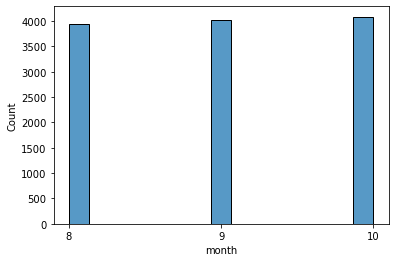

In [14]:
#month
months=['August','September','October']

print('Averages by month \n')
#avg transaction amount
avg_amt=df.groupby('month')['amount'].mean()
print("Average transaction amount")
for i,m in enumerate(months):
    print(m,":{:.2f}".format(avg_amt[i+8]))

#avg number of transaction
print('\nAverage number of transaction by month')
av_mon=df.groupby(['month','customer_id']).count()['amount']
for i,m in enumerate(months):
    avg=av_mon[i+8].mean()
    print(m,": {:.2f}".format(avg))
    
sns.histplot(df['month']);
plt.xticks([8,9,10]);

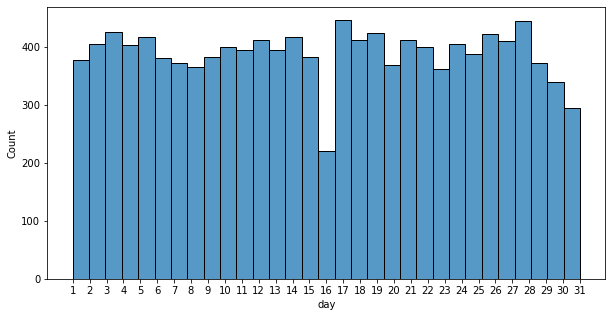

In [15]:
#day
plt.figure(figsize=(10,5))
sns.histplot(df['day'],bins=31)
plt.xticks(range(1,32));

Averages by weekday 

Average transaction amount
Monday :373.22
Tuesday :221.58
Wednesday :195.22
Thursday :184.01
Friday :249.35
Saturday :54.42
Sunday :53.02

Average number of transaction by weekday
Monday : 13.74
Tuesday : 15.02
Wednesday : 20.63
Thursday : 18.01
Friday : 20.94
Saturday : 17.26
Sunday : 15.50


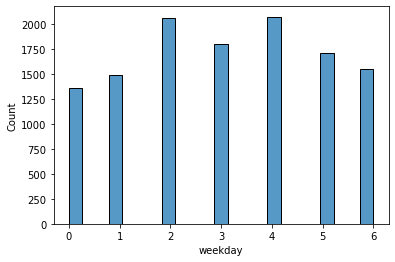

In [16]:
#weekday
weekdays = ("Monday", "Tuesday","Wednesday", "Thursday","Friday", "Saturday","Sunday")

print('Averages by weekday \n')
#avg transaction amount
avg_amt=df.groupby('weekday')['amount'].mean()
print("Average transaction amount")
for i,w in enumerate(weekdays):
    print(w,":{:.2f}".format(avg_amt[i]))

#avg number of transaction
print('\nAverage number of transaction by weekday')
av_weekday=df.groupby(['weekday','customer_id']).count()['amount']
for i,m in enumerate(weekdays):
    avg=av_weekday[i].mean()
    print(m,": {:.2f}".format(avg))
    
sns.histplot(df['weekday']);

In [17]:
### location
df_loc=df[['customer_id', 'long_lat', 'merchant_long_lat']].dropna()

In [18]:
df_loc['longitude']=df_loc['long_lat'].apply(lambda x:float(x.partition('-')[0]))
df_loc['latitude']=df_loc['long_lat'].apply(lambda x:float(x.partition('-')[2]))

df_loc['merch_longitude']=df_loc['merchant_long_lat'].apply(lambda x:float(x.partition('-')[0]))
df_loc['merch_latitude']=df_loc['merchant_long_lat'].apply(lambda x:float(x.partition('-')[2]))

In [19]:
df_loc.head()

,customer_id,long_lat,merchant_long_lat,longitude,latitude,merch_longitude,merch_latitude
0,CUS-2487424745,153.41 -27.95,153.38 -27.99,153.41,27.95,153.38,27.99
1,CUS-2487424745,153.41 -27.95,151.21 -33.87,153.41,27.95,151.21,33.87
2,CUS-2142601169,151.23 -33.94,151.21 -33.87,151.23,33.94,151.21,33.87
3,CUS-1614226872,153.10 -27.66,153.05 -26.68,153.10,27.66,153.05,26.68
4,CUS-2487424745,153.41 -27.95,153.44 -28.06,153.41,27.95,153.44,28.06


In [20]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

df_loc['distance']=df_loc.apply(lambda x:distance(x['latitude'],x['merch_latitude'],x['longitude'],x['merch_longitude']),
                               axis=1)

Average distance between merchant and customer:562.2949828091431 km


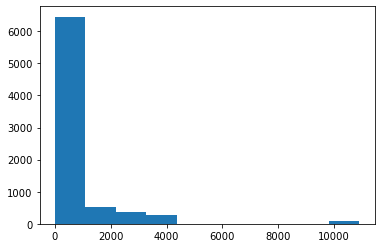

In [21]:
plt.hist(df_loc['distance']);
print(f"Average distance between merchant and customer:{df_loc['distance'].mean()} km")

In [22]:
df_loc.describe()

,longitude,latitude,merch_longitude,merch_latitude,distance
count,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000
mean,143.779001,37.682413,143.433277,32.752651,562.294983
std,16.901687,54.745625,12.090074,5.282423,1366.803804
min,114.620000,12.370000,113.830000,12.330000,0.000000
25%,138.670000,27.950000,144.680000,29.440000,15.119940
50%,145.730000,33.780000,145.830000,33.840000,29.996920
75%,151.230000,37.580000,151.210000,37.710000,299.120476
max,255.000000,573.000000,153.610000,43.310000,10897.288267


In [23]:
## removing the outlier
df_loc=df_loc[df_loc.latitude!=df_loc.latitude.max()]

Average distance between merchant and customer:458.5000566867439 km


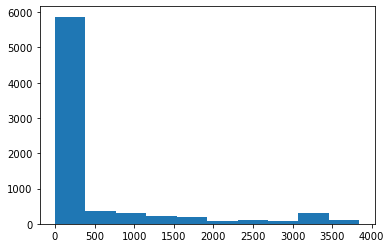

In [24]:
plt.hist(df_loc['distance']);
print(f"Average distance between merchant and customer:{df_loc['distance'].mean()} km")